In [136]:
import numpy as np
from sklearn.metrics import accuracy_score
import csv
import os.path
import pandas as pd

df = pd.read_csv('./data/dataset_train.csv')
df.drop(['Index', 'First Name', 'Last Name', 'Birthday', 'Best Hand', \
         'Arithmancy','Care of Magical Creatures','Defense Against the Dark Arts'], axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)
#df.dropna(inplace=True)
y = pd.DataFrame()
y = df['Hogwarts House']
df.drop(['Hogwarts House'], axis=1, inplace=True)
df.apply(pd.to_numeric,downcast='float')
df = (df-df.mean())/df.std()

<function matplotlib.pyplot.show>

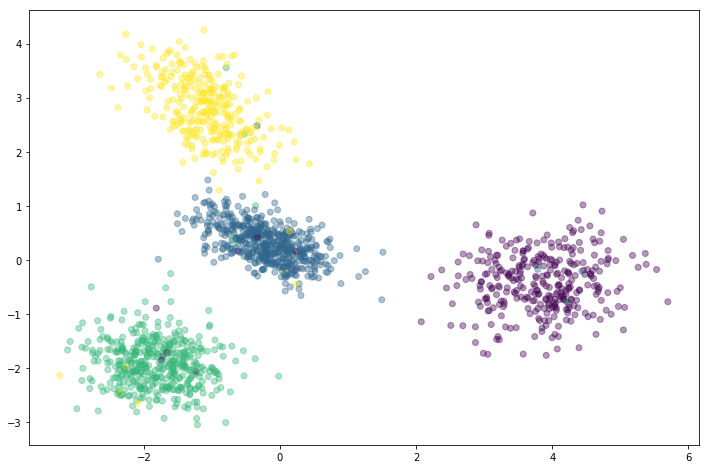

In [137]:
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

pca = decomposition.PCA(n_components=2)
pca.fit(df)
train_red = pca.transform(df)
ycolor = y.astype('category').cat.codes

plt.figure(figsize=(12, 8))
plt.scatter(train_red[:,0],train_red[:,1], c=ycolor, alpha=0.4)
plt.show

In [125]:
#[184, 255, 504, 515, 704, 815, 1191, 1444, 1448, 1515]

#[ 184,  200,  255,  339,  445,  456,  504,  515,  618,  681,  704,
#         815,  820,  824,  915,  941, 1078, 1098, 1113, 1191, 1282, 1419,
#        1435, 1444, 1446, 1448, 1515, 1525, 1596]
outliers = []

for index, row in enumerate(train_red):
    if row[0] > 3 and y[index] != 'Gryffindor':
        outliers.append(index)
        print('Gryffindor => ', y[index])
#     if row[0] < -1 and row[1] < -0.5 and y[index] != 'Ravenclaw':
#         outliers.append(index)
#         print('Ravenclaw => ',y[index])
#     if row[0] < 0 and row[1] > 2 and y[index] != 'Slytherin':
#         outliers.append(index)
#         print('Slytherin => ', y[index])
#     if row[0] < 1.2 and row[0] > -1 and row[1] < 1.5 and row[1] > -1 and y[index] != 'Hufflepuff':
#         outliers.append(index)
#         print('Hufflepuff => ',y[index])
print(len(outliers))
outliers

Gryffindor =>  Ravenclaw
Gryffindor =>  Ravenclaw
Gryffindor =>  Hufflepuff
Gryffindor =>  Hufflepuff
4


[504, 1098, 1113, 1191]

In [151]:
outliers = pd.DataFrame(outliers)
outliers[0]

0     504
1    1098
2    1113
3    1191
Name: 0, dtype: int64

In [152]:
print(df.shape)
df_red = df.drop(df.index[outliers[0]])
print(df_red.shape)

(1600, 10)
(1596, 10)
